# Machine Learning in Stock prices prediction
This is a code took it and modify from the excellent book: Python machine learning with examples by Yuxi Liu

## 1) Obtención  y tratamiento de datos

### 1.1) Datos de entrenamiento

Importación de datos desde Yahoo Finance

In [1]:
import yfinance as yf

# Descarga datos históricos de precios para la acción de Apple
ticker = "^DJI" # DowJones
original_data = yf.download(ticker, start="1998-01-01", end="2022-06-30") # año, mes y dia
original_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-01-02 00:00:00-05:00,7910.200195,7965.040039,7880.850098,7965.000000,7965.000000,47030000
1998-01-05 00:00:00-05:00,7967.000000,8035.540039,7912.979980,7979.000000,7979.000000,67560000
1998-01-06 00:00:00-05:00,7978.250000,7978.250000,7880.350098,7906.250000,7906.250000,60200000
1998-01-07 00:00:00-05:00,7904.799805,7905.759766,7776.970215,7902.299805,7902.299805,60990000
1998-01-08 00:00:00-05:00,7902.000000,7902.020020,7796.149902,7802.600098,7802.600098,63720000
...,...,...,...,...,...,...
2022-06-23 00:00:00-04:00,30570.330078,30715.630859,30293.400391,30677.359375,30677.359375,361420000
2022-06-24 00:00:00-04:00,30846.939453,31517.289062,30846.939453,31500.679688,31500.679688,465480000
2022-06-27 00:00:00-04:00,31533.599609,31598.589844,31351.369141,31438.259766,31438.259766,309910000


### 1.2) Feature engeenering

Generación de las columnas de variables recorridas 1 dia. Precio de apertura del día anterior, cierre, máximo, minimos y volumen de compra de un día anterios. Para eso se usa la funcion shift

In [2]:
#First, we implement feature generation by starting with a sub-function that directly creates features from the original six features, as follows:

# Creacion de una funcion
def add_original_feature(df, df_new):
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(periods=1)  #La fucnion shift hace que me tome la fila pasada. Por lo tanto open_1 es el precio de apertura del dia pasado. Periods es la cantidad de veces que se va recorrer
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)

# NOTA: Todos estos son los precios de apertura, cierre, máximo, mínimo y volumen de comopras de un día antras

Generación del precio promedio cada 5, 30 y 365 días asi como el ratio del precio de 5 días / precio 30 días etc

In [3]:
# Otra funcion que genera nuevos features de las medias moviles
def add_avg_price(df, df_new):
    df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']

# IMPORTANTE: vease como usa la funcion rolling para irse hacia atras y generar una operacion con esos datos. Los números son 5, 21 y 252 dado el número de día en que abre la bolsa en esos periodos de tiempo

Generación del promedio de volumen de compras en 5, 30 y 365 días asi como sus ratios

In [4]:
# Similarly, a sub-function that generates six features related to average volumes is as follows:

# Tercera funcion:
def add_avg_volume(df, df_new):
    df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] = df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']

Generación de las desviaciones estandar (o la volatilidad del precio de la accion) del precio de la acción en los últimos 5, 30 y 365 días. Asi como sus ratios

In [5]:
#As for the standard deviation, we develop the following sub-function for the price- related features: (esto para la variabilidad del precio y volumen de compra)

def add_std_price(df, df_new):
    df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] =  df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']

Volatilidad  (desviacion estandar) de los volumenes de compra en los últimos 5,30 y 365 días asi como sus ratios.

In [6]:
#Similarly, a sub-function that generates six volume-based standard deviation features is as follows:
def add_std_volume(df, df_new):
    df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']

Retornos generados en los ultimos 1, 5, 30 y 365 días en terminos porcentuales. Esto quiere decir cuanto a subido o bajado en terminos porcentuales la accioón del not precio

También se examina el moving averrage que básicamente es el promedio del retorno de la acción  en los últimos 5, 30 y 365 días

In [7]:
# Seven return-based features are generated using the following sub-function:
def add_return_feature(df, df_new):
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)

# IMPORTATNE: Vease como lo del retorno es tajante, agarra el dato 5 días antes y lo compara con el actual. Lo mismo con 30 y 365 días. El moving averagne en cambio va de día en día sacando los promedio de retorno cada 5, 30 y 365 días

In [8]:
# Finally, we put together the main feature generation function that calls all the preceding sub-functions:
import pandas as pd

def generate_features(df):

#Generate features for a stock/index based on historical  price and performance
# @param df: dataframe with columns "Open", "Close", "High",  "Low", "Volume", "Adjusted Close"
#@return: dataframe, data set with new features


# VASE como aqui e aplican todas la funciones creadas. Es una funcion para ejecturas todas la otras funciones (pudo hacer esto haciendo las funciones por separado o hacer solo una funcion global que hiciera todo esto)
    df_new = pd.DataFrame()
    # 6 original features
    add_original_feature(df, df_new)
    # 31 generated features
    add_avg_price(df, df_new)
    add_avg_volume(df, df_new)
    add_std_price(df, df_new)
    add_std_volume(df, df_new)
    add_return_feature(df, df_new)
    # the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new

Aplicamos las funciones

In [9]:
data = generate_features(df)
data
# Vease como en este nuevo DF no se cuenta con los datos totales de cada día es decir no se cuenta con el volumen, maximo y minimo de cada día en particular. Todos estos indicadores fueron remplazdos por el de un día anterior y por todos los demás generados

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-06 00:00:00-05:00,9315.419922,9184.780273,9311.190430,9338.740234,9182.980469,79860000.0,9254.501953,9039.459961,8640.889261,1.023789,...,1.052709,1.017153,0.013819,0.009152,0.048595,0.166962,-0.000710,0.000679,0.000643,9544.969727
1999-01-07 00:00:00-05:00,9542.139648,9315.419922,9544.969727,9562.219727,9315.419922,103340000.0,9299.299805,9064.642346,8647.392117,1.025887,...,1.304743,1.098868,0.025107,0.024031,0.058654,0.207269,0.001864,0.002308,0.000691,9537.759766
1999-01-08 00:00:00-05:00,9538.280273,9542.139648,9537.759766,9542.139648,9426.019531,88290000.0,9351.923828,9086.894252,8653.882037,1.029166,...,1.023090,1.100514,-0.000755,0.028370,0.051518,0.206960,0.004843,0.002772,0.000827,9643.320312
1999-01-11 00:00:00-05:00,9643.320312,9538.280273,9643.320312,9647.959961,9525.410156,103250000.0,9444.301953,9116.196150,8661.186483,1.035992,...,0.562344,1.156483,0.011068,0.050307,0.068159,0.235911,0.005686,0.002449,0.000826,9619.889648
1999-01-12 00:00:00-05:00,9618.860352,9643.320312,9619.889648,9643.320312,9532.610352,98720000.0,9531.425977,9145.277065,8669.279696,1.042224,...,0.564098,1.192591,-0.002430,0.047431,0.067786,0.269048,0.009910,0.003199,0.000920,9474.679688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23 00:00:00-04:00,30570.330078,30352.570312,30483.130859,30777.919922,30166.009766,343490000.0,30299.551953,31846.778553,34538.439182,0.951417,...,1.533098,1.088546,-0.001543,0.003896,-0.024911,-0.102000,0.000206,-0.001005,-0.000359,30677.359375
2022-06-24 00:00:00-04:00,30846.939453,30570.330078,30677.359375,30715.630859,30293.400391,361420000.0,30301.317969,31789.498512,34525.753154,0.953186,...,1.578550,1.089163,0.006372,0.000288,-0.037731,-0.094375,0.000893,-0.001092,-0.000373,31500.679688
2022-06-27 00:00:00-04:00,31533.599609,30846.939453,31500.679688,31517.289062,30846.939453,465480000.0,30616.039844,31769.120443,34515.054184,0.963704,...,1.580174,1.110448,0.026838,0.052581,-0.013403,-0.078842,0.000167,-0.001731,-0.000339,31438.259766


**IMPORTANTE**:

Los datos por medio de feature engeenering que se generaron básicamente están agrupados en los siguintes grupos:

1) Apertura, cierre, máximo precio, mínimo precio y volumen del día anterior
2) **Precio promedio:** Precio promedio  de la acción en los últimos 5,30 y 365 días asi como sus ratios
3) **Volatilidad del precio:** Volatilidad del precio (desviación estandar) del precio de la acción en los últimos 5,30 y 365 días asi como sus ratios
4) **Volatidlidad en los volumenes de compra**: Volatilidad en los volumenes de compra (desviación estandar) de los volumenes de compra de la acción en los últimnos 5,30 y 365 días asi como sus ratios
5) **Retornos y retornos medios**: Vease como lo del retorno es tajante, agarra el dato 5 días antes y lo compara con el actual. Lo mismo con 30 y 365 días. El moving averagne en cambio va de día en día sacando los promedio de retorno cada 5, 30 y 365 días

Visualización de los datos

In [107]:
# Using plotly.express
import plotly.express as px

df = px.data.stocks()
fig = px.line(data_frame=data, x=data.index, y="close", title="Dow Jones Index")


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
# https://plotly.com/python/time-series/

### 1.3) Generación del training y testing dataset

In [108]:
# Seleccionamos los inicio y fin para el trainig y testin dataset

start_train = '1988-01-01'
end_train = '2020-07-31' # Alrededor de 30 años de datos de entrenamiento

start_test = '2020-08-01'  # 2 años de datos de testeo
end_test = '2022-06-30'

data_train = data.loc[start_train:end_train] # Lo esta filtrado con el indice
data_train

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-06 00:00:00-05:00,9315.419922,9184.780273,9311.190430,9338.740234,9182.980469,79860000.0,9254.501953,9039.459961,8640.889261,1.023789,...,1.052709,1.017153,0.013819,0.009152,0.048595,0.166962,-0.000710,0.000679,0.000643,9544.969727
1999-01-07 00:00:00-05:00,9542.139648,9315.419922,9544.969727,9562.219727,9315.419922,103340000.0,9299.299805,9064.642346,8647.392117,1.025887,...,1.304743,1.098868,0.025107,0.024031,0.058654,0.207269,0.001864,0.002308,0.000691,9537.759766
1999-01-08 00:00:00-05:00,9538.280273,9542.139648,9537.759766,9542.139648,9426.019531,88290000.0,9351.923828,9086.894252,8653.882037,1.029166,...,1.023090,1.100514,-0.000755,0.028370,0.051518,0.206960,0.004843,0.002772,0.000827,9643.320312
1999-01-11 00:00:00-05:00,9643.320312,9538.280273,9643.320312,9647.959961,9525.410156,103250000.0,9444.301953,9116.196150,8661.186483,1.035992,...,0.562344,1.156483,0.011068,0.050307,0.068159,0.235911,0.005686,0.002449,0.000826,9619.889648
1999-01-12 00:00:00-05:00,9618.860352,9643.320312,9619.889648,9643.320312,9532.610352,98720000.0,9531.425977,9145.277065,8669.279696,1.042224,...,0.564098,1.192591,-0.002430,0.047431,0.067786,0.269048,0.009910,0.003199,0.000920,9474.679688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27 00:00:00-04:00,26447.669922,26533.410156,26469.890625,26625.699219,26402.859375,494170000.0,26729.866016,26210.120071,26288.602268,1.019830,...,0.435122,0.481199,-0.006845,-0.007576,0.040240,-0.024726,-0.000592,0.000993,0.000170,26584.769531
2020-07-28 00:00:00-04:00,26529.449219,26447.669922,26584.769531,26625.460938,26426.919922,400930000.0,26710.646094,26250.080543,26286.190840,1.017545,...,0.303695,0.482284,0.004340,-0.003602,0.032595,-0.022347,-0.001492,0.001960,0.000162,26379.279297
2020-07-29 00:00:00-04:00,26388.439453,26529.449219,26379.279297,26556.839844,26361.710938,361090000.0,26618.421875,26315.019996,26282.849292,1.011530,...,0.310772,0.306496,-0.007730,-0.017180,0.054515,-0.030934,-0.000690,0.001606,0.000171,26539.570312


## 2) Entrenamiento del modelo SDG, Precio de cierre
(modelo linean con optimizador stocastic descendt gradient)

Separación del Feature Dataset y el Dataset con la varible objetivo

In [109]:
X_train = data_train.drop('close', axis=1).values  #Se queda con todo menos con el clos que es la variable objetivo

# Se queda solo con las variables objtivo (cierre del precio al día)
y_train = data_train['close'].values
y_train

array([ 9544.96972656,  9537.75976562,  9643.3203125 , ...,
       26539.5703125 , 26313.65039062, 26428.3203125 ])

In [110]:
data_test = data.loc[start_test:end_test]
X_test = data_test.drop('close', axis=1).values
y_test = data_test['close'].values
y_test

array([26664.40039062, 26828.47070312, 27201.51953125, 27386.98046875,
       27433.48046875, 27791.43945312, 27686.91015625, 27976.83984375,
       27896.72070312, 27931.01953125, 27844.91015625, 27778.0703125 ,
       27692.88085938, 27739.73046875, 27930.33007812, 28308.4609375 ,
       28248.43945312, 28331.91992188, 28492.26953125, 28653.86914062,
       28430.05078125, 28645.66015625, 29100.5       , 28292.73046875,
       28133.31054688, 27500.890625  , 27940.47070312, 27534.58007812,
       27665.640625  , 27993.33007812, 27995.59960938, 28032.38085938,
       27901.98046875, 27657.41992188, 27147.69921875, 27288.1796875 ,
       26763.13085938, 26815.43945312, 27173.9609375 , 27584.06054688,
       27452.66015625, 27781.69921875, 27816.90039062, 27682.81054688,
       28148.640625  , 27772.75976562, 28303.4609375 , 28425.50976562,
       28586.90039062, 28837.51953125, 28679.81054688, 28514.        ,
       28494.19921875, 28606.31054688, 28195.41992188, 28308.7890625 ,
      

All fields in the dataframe data except 'close' are feature columns, and 'close' is the target column. We have 7,558 training samples and each sample is 37-dimensional. We also have 251 testing samples:

We will first experiment with SGD-based linear regression. Before we train the model, you should realize that SGD-based algorithms are sensitive to data with features at very different scales; for example, in our case, the average value of the open feature is around 8,856, while that of the moving_ avg_365 feature is 0.00037 or so. Hence, we need to normalize features
into the same or a comparable scale. We do so by removing the mean and rescaling to unit variance:

### 2.1) Escalamiento de las variables

In [111]:
#Rescalamiento de las variriables , recordemos que estandar scaler es el Z-value
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reescalamos tanto los datos de entrenamiento como los de testeo
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

### 2.2) Ejecución del entrenamiento bajo Grid Search

In [112]:
%%time
# Now we can search for the SGD-based linear regression with the optimal set of parameters. We specify l2 regularization and 1,000 iterations, and tune the regularization term multiplier, alpha, and initial learning rate, eta0:


# Alta de parametros
param_grid = {
    "alpha": [1e-4, 3e-4, 1e-3],
    "eta0": [0.01, 0.03, 0.1],
}

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

# Creacion del modelo
lr = SGDRegressor(penalty='l2', max_iter=1000, random_state=42)

#Grid Search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Entrenamingo y evalaucion cruzada
grid_search.fit(X_scaled_train, y_train)

CPU times: user 132 ms, sys: 97.1 ms, total: 229 ms
Wall time: 9.89 s


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0003, 0.001],
                         'eta0': [0.01, 0.03, 0.1]},
             scoring='r2')

In [113]:
print(grid_search.best_params_)

{'alpha': 0.0001, 'eta0': 0.01}


Selección del mejor modelo y prediccion

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

lr_best = grid_search.best_estimator_

predictions_lr = lr_best.predict(X_scaled_test)
predictions_lr

array([26608.65494203, 26783.2049686 , 26906.18669097, 27149.33102561,
       27306.92982268, 27405.45510555, 27670.93724624, 27777.01329418,
       27857.92396773, 27831.17226517, 27888.43084645, 27859.69743095,
       27825.69669186, 27750.3055383 , 27735.99595193, 27898.81103525,
       28155.78822283, 28143.38256837, 28230.08156987, 28397.02435774,
       28532.04187252, 28420.4183165 , 28554.6842131 , 28863.12674597,
       28466.24328163, 28195.41531989, 27835.44155504, 28042.27636916,
       27806.46048391, 27844.38557744, 28046.18296767, 28148.54243786,
       28105.60166779, 28028.38820185, 27891.03980648, 27456.19471941,
       27527.28453008, 27216.04702781, 27094.39041299, 27303.92696867,
       27657.5146329 , 27565.41067168, 27873.92722359, 27893.93987188,
       27798.55523836, 28135.24458276, 28044.08315001, 28265.73871227,
       28358.98901916, 28537.4231731 , 28641.72953925, 28654.91613067,
       28518.56389473, 28459.77555672, 28613.95644775, 28354.09686821,
      

### 2.3) Medición del error

In [115]:
print(f'MSE: {mean_squared_error(y_test, predictions_lr):.3f}')
print(f'MAE: {mean_absolute_error(y_test, predictions_lr):.3f}')
print(f'R2: {r2_score(y_test, predictions_lr):.3f}')
# Recordemos nuevamente que el MAE (Mean abolsute  error) es  el error promedio de la esdcala original.
# Por otrs parte el R2 se ve bastante bien tiene un porcntaje muy cercano a 1 que quiere decir que el modeo es bastante atinado

MSE: 155723.169
MAE: 289.847
R2: 0.979


### 2.4) Visualización de resultados
Visualizaremos los resultatos de la predicción para el DF de datos de testeo

In [116]:
visualizacion = data_test.copy()
visualizacion["Close prediction"] = predictions_lr
visualizacion = pd.DataFrame(data=visualizacion["Close prediction"])
visualizacion

,Close prediction
Date,
2020-08-03 00:00:00-04:00,26608.654942
2020-08-04 00:00:00-04:00,26783.204969
2020-08-05 00:00:00-04:00,26906.186691
2020-08-06 00:00:00-04:00,27149.331026
2020-08-07 00:00:00-04:00,27306.929823
...,...
2022-06-23 00:00:00-04:00,31023.134631
2022-06-24 00:00:00-04:00,31108.683151
2022-06-27 00:00:00-04:00,31666.652037


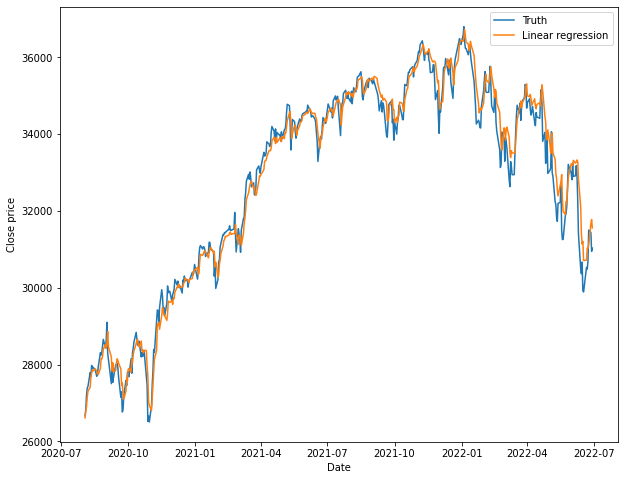

In [127]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('figure', figsize=(10, 8))

plt.plot(data_test.index, data_test.close )
plt.plot(data_test.index, predictions_lr)
# Para agregar mñas lineas de otros DF:
#plt.plot(data_test.index, predictions_rf, c='r')
#plt.plot(data_test.index, predictions_svr, c='g')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(['Truth', 'Linear regression'])

plt.show()

## 3) Entrenamiento del modelo SDG, precio máximo del día

### 3.1) Importación de datos

In [87]:
import yfinance as yf

# Descarga datos históricos de precios para la acción de Apple
ticker = "^DJI" # DowJones
df_maximo = yf.download(ticker, start="1998-01-01", end="2022-06-30") # año, mes y dia
df_maximo

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-01-02 00:00:00-05:00,7910.200195,7965.040039,7880.850098,7965.000000,7965.000000,47030000
1998-01-05 00:00:00-05:00,7967.000000,8035.540039,7912.979980,7979.000000,7979.000000,67560000
1998-01-06 00:00:00-05:00,7978.250000,7978.250000,7880.350098,7906.250000,7906.250000,60200000
1998-01-07 00:00:00-05:00,7904.799805,7905.759766,7776.970215,7902.299805,7902.299805,60990000
1998-01-08 00:00:00-05:00,7902.000000,7902.020020,7796.149902,7802.600098,7802.600098,63720000
...,...,...,...,...,...,...
2022-06-23 00:00:00-04:00,30570.330078,30715.630859,30293.400391,30677.359375,30677.359375,361420000
2022-06-24 00:00:00-04:00,30846.939453,31517.289062,30846.939453,31500.679688,31500.679688,465480000
2022-06-27 00:00:00-04:00,31533.599609,31598.589844,31351.369141,31438.259766,31438.259766,309910000


In [89]:
maximo_cierre = df_maximo.copy()
maximo_cierre = pd.DataFrame(data = maximo_cierre["High"])
maximo_cierre

,High
Date,
1998-01-02 00:00:00-05:00,7965.040039
1998-01-05 00:00:00-05:00,8035.540039
1998-01-06 00:00:00-05:00,7978.250000
1998-01-07 00:00:00-05:00,7905.759766
1998-01-08 00:00:00-05:00,7902.020020
...,...
2022-06-23 00:00:00-04:00,30715.630859
2022-06-24 00:00:00-04:00,31517.289062
2022-06-27 00:00:00-04:00,31598.589844


### 3.2) Feature  engeenering

In [85]:
data_maximo = generate_features(df)
data_maximo

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-06 00:00:00-05:00,9315.419922,9184.780273,9311.190430,9338.740234,9182.980469,79860000.0,9254.501953,9039.459961,8640.889261,1.023789,...,1.052709,1.017153,0.013819,0.009152,0.048595,0.166962,-0.000710,0.000679,0.000643,9544.969727
1999-01-07 00:00:00-05:00,9542.139648,9315.419922,9544.969727,9562.219727,9315.419922,103340000.0,9299.299805,9064.642346,8647.392117,1.025887,...,1.304743,1.098868,0.025107,0.024031,0.058654,0.207269,0.001864,0.002308,0.000691,9537.759766
1999-01-08 00:00:00-05:00,9538.280273,9542.139648,9537.759766,9542.139648,9426.019531,88290000.0,9351.923828,9086.894252,8653.882037,1.029166,...,1.023090,1.100514,-0.000755,0.028370,0.051518,0.206960,0.004843,0.002772,0.000827,9643.320312
1999-01-11 00:00:00-05:00,9643.320312,9538.280273,9643.320312,9647.959961,9525.410156,103250000.0,9444.301953,9116.196150,8661.186483,1.035992,...,0.562344,1.156483,0.011068,0.050307,0.068159,0.235911,0.005686,0.002449,0.000826,9619.889648
1999-01-12 00:00:00-05:00,9618.860352,9643.320312,9619.889648,9643.320312,9532.610352,98720000.0,9531.425977,9145.277065,8669.279696,1.042224,...,0.564098,1.192591,-0.002430,0.047431,0.067786,0.269048,0.009910,0.003199,0.000920,9474.679688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23 00:00:00-04:00,30570.330078,30352.570312,30483.130859,30777.919922,30166.009766,343490000.0,30299.551953,31846.778553,34538.439182,0.951417,...,1.533098,1.088546,-0.001543,0.003896,-0.024911,-0.102000,0.000206,-0.001005,-0.000359,30677.359375
2022-06-24 00:00:00-04:00,30846.939453,30570.330078,30677.359375,30715.630859,30293.400391,361420000.0,30301.317969,31789.498512,34525.753154,0.953186,...,1.578550,1.089163,0.006372,0.000288,-0.037731,-0.094375,0.000893,-0.001092,-0.000373,31500.679688
2022-06-27 00:00:00-04:00,31533.599609,30846.939453,31500.679688,31517.289062,30846.939453,465480000.0,30616.039844,31769.120443,34515.054184,0.963704,...,1.580174,1.110448,0.026838,0.052581,-0.013403,-0.078842,0.000167,-0.001731,-0.000339,31438.259766


Integrar el precio máximo por día

In [94]:
data_maximo  = pd.merge (left=data_maximo, right=maximo_cierre, left_index=True, right_index= True, how="left" )

data_maximo

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close,High
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-06 00:00:00-05:00,9315.419922,9184.780273,9311.190430,9338.740234,9182.980469,79860000.0,9254.501953,9039.459961,8640.889261,1.023789,...,1.017153,0.013819,0.009152,0.048595,0.166962,-0.000710,0.000679,0.000643,9544.969727,9562.219727
1999-01-07 00:00:00-05:00,9542.139648,9315.419922,9544.969727,9562.219727,9315.419922,103340000.0,9299.299805,9064.642346,8647.392117,1.025887,...,1.098868,0.025107,0.024031,0.058654,0.207269,0.001864,0.002308,0.000691,9537.759766,9542.139648
1999-01-08 00:00:00-05:00,9538.280273,9542.139648,9537.759766,9542.139648,9426.019531,88290000.0,9351.923828,9086.894252,8653.882037,1.029166,...,1.100514,-0.000755,0.028370,0.051518,0.206960,0.004843,0.002772,0.000827,9643.320312,9647.959961
1999-01-11 00:00:00-05:00,9643.320312,9538.280273,9643.320312,9647.959961,9525.410156,103250000.0,9444.301953,9116.196150,8661.186483,1.035992,...,1.156483,0.011068,0.050307,0.068159,0.235911,0.005686,0.002449,0.000826,9619.889648,9643.320312
1999-01-12 00:00:00-05:00,9618.860352,9643.320312,9619.889648,9643.320312,9532.610352,98720000.0,9531.425977,9145.277065,8669.279696,1.042224,...,1.192591,-0.002430,0.047431,0.067786,0.269048,0.009910,0.003199,0.000920,9474.679688,9620.150391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23 00:00:00-04:00,30570.330078,30352.570312,30483.130859,30777.919922,30166.009766,343490000.0,30299.551953,31846.778553,34538.439182,0.951417,...,1.088546,-0.001543,0.003896,-0.024911,-0.102000,0.000206,-0.001005,-0.000359,30677.359375,30715.630859
2022-06-24 00:00:00-04:00,30846.939453,30570.330078,30677.359375,30715.630859,30293.400391,361420000.0,30301.317969,31789.498512,34525.753154,0.953186,...,1.089163,0.006372,0.000288,-0.037731,-0.094375,0.000893,-0.001092,-0.000373,31500.679688,31517.289062
2022-06-27 00:00:00-04:00,31533.599609,30846.939453,31500.679688,31517.289062,30846.939453,465480000.0,30616.039844,31769.120443,34515.054184,0.963704,...,1.110448,0.026838,0.052581,-0.013403,-0.078842,0.000167,-0.001731,-0.000339,31438.259766,31598.589844


### 3.3) Generación del training y testing dataset

In [95]:
# Seleccionamos los inicio y fin para el trainig y testin dataset
start_train = '1988-01-01'
end_train = '2020-07-31' # Alrededor de 30 años de datos de entrenamiento

start_test = '2020-08-01'  # 2 años de datos de testeo
end_test = '2022-06-30'

data_train_maximo = data_maximo.loc[start_train:end_train] # Lo esta filtrado con el indice
data_train_maximo

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close,High
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-06 00:00:00-05:00,9315.419922,9184.780273,9311.190430,9338.740234,9182.980469,79860000.0,9254.501953,9039.459961,8640.889261,1.023789,...,1.017153,0.013819,0.009152,0.048595,0.166962,-0.000710,0.000679,0.000643,9544.969727,9562.219727
1999-01-07 00:00:00-05:00,9542.139648,9315.419922,9544.969727,9562.219727,9315.419922,103340000.0,9299.299805,9064.642346,8647.392117,1.025887,...,1.098868,0.025107,0.024031,0.058654,0.207269,0.001864,0.002308,0.000691,9537.759766,9542.139648
1999-01-08 00:00:00-05:00,9538.280273,9542.139648,9537.759766,9542.139648,9426.019531,88290000.0,9351.923828,9086.894252,8653.882037,1.029166,...,1.100514,-0.000755,0.028370,0.051518,0.206960,0.004843,0.002772,0.000827,9643.320312,9647.959961
1999-01-11 00:00:00-05:00,9643.320312,9538.280273,9643.320312,9647.959961,9525.410156,103250000.0,9444.301953,9116.196150,8661.186483,1.035992,...,1.156483,0.011068,0.050307,0.068159,0.235911,0.005686,0.002449,0.000826,9619.889648,9643.320312
1999-01-12 00:00:00-05:00,9618.860352,9643.320312,9619.889648,9643.320312,9532.610352,98720000.0,9531.425977,9145.277065,8669.279696,1.042224,...,1.192591,-0.002430,0.047431,0.067786,0.269048,0.009910,0.003199,0.000920,9474.679688,9620.150391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27 00:00:00-04:00,26447.669922,26533.410156,26469.890625,26625.699219,26402.859375,494170000.0,26729.866016,26210.120071,26288.602268,1.019830,...,0.481199,-0.006845,-0.007576,0.040240,-0.024726,-0.000592,0.000993,0.000170,26584.769531,26625.460938
2020-07-28 00:00:00-04:00,26529.449219,26447.669922,26584.769531,26625.460938,26426.919922,400930000.0,26710.646094,26250.080543,26286.190840,1.017545,...,0.482284,0.004340,-0.003602,0.032595,-0.022347,-0.001492,0.001960,0.000162,26379.279297,26556.839844
2020-07-29 00:00:00-04:00,26388.439453,26529.449219,26379.279297,26556.839844,26361.710938,361090000.0,26618.421875,26315.019996,26282.849292,1.011530,...,0.306496,-0.007730,-0.017180,0.054515,-0.030934,-0.000690,0.001606,0.000171,26539.570312,26602.449219


Separación del Feature Dataset y el Dataset con la varible objetivo

In [128]:
X_train_max = data_train_maximo.drop( columns=['close', "High"] , axis=1).values  #Se queda con todo menos con el clos que es la variable objetivo

X_train_max

array([[ 9.31541992e+03,  9.18478027e+03,  9.31119043e+03, ...,
        -7.09861834e-04,  6.78997582e-04,  6.43350271e-04],
       [ 9.54213965e+03,  9.31541992e+03,  9.54496973e+03, ...,
         1.86395586e-03,  2.30819622e-03,  6.91214115e-04],
       [ 9.53828027e+03,  9.54213965e+03,  9.53775977e+03, ...,
         4.84287591e-03,  2.77199055e-03,  8.27027733e-04],
       ...,
       [ 2.63884395e+04,  2.65294492e+04,  2.63792793e+04, ...,
        -6.90447794e-04,  1.60584783e-03,  1.71409911e-04],
       [ 2.63674199e+04,  2.63884395e+04,  2.65395703e+04, ...,
        -3.43221978e-03,  2.58806850e-03,  1.36519308e-04],
       [ 2.64093301e+04,  2.63674199e+04,  2.63136504e+04, ...,
        -3.44970448e-03,  1.77286978e-03,  1.64032996e-04]])

In [129]:
# Se queda solo con las variables objtivo (cierre del precio al día)
y_train_max = data_train_maximo['High'].values
y_train_max

array([ 9562.21972656,  9542.13964844,  9647.95996094, ...,
       26602.44921875, 26374.9296875 , 26440.01953125])

Generación del DF de testing

In [130]:
data_test_max = data_maximo.loc[start_test:end_test]
X_test_max = data_test_max.drop(columns=['close', "High"], axis=1).values
y_test_max = data_test_max["High"].values
y_test_max

array([26707.25976562, 26832.72070312, 27221.66992188, 27394.09960938,
       27456.24023438, 27803.859375  , 28154.88085938, 28043.890625  ,
       27986.09960938, 27977.81054688, 27999.81054688, 27891.11914062,
       27920.41992188, 27781.4609375 , 27959.48046875, 28314.93945312,
       28400.74023438, 28353.80078125, 28634.22070312, 28733.34960938,
       28643.66015625, 28659.25976562, 29162.88085938, 29199.34960938,
       28539.75      , 27925.23046875, 28206.2109375 , 28174.77929688,
       27828.8203125 , 28086.06054688, 28231.06054688, 28364.76953125,
       28056.7890625 , 27946.68945312, 27484.7109375 , 27333.08984375,
       27464.4609375 , 27094.84960938, 27239.2890625 , 27722.59960938,
       27605.59960938, 28026.33007812, 28041.4609375 , 27861.4296875 ,
       28162.640625  , 28354.48046875, 28369.66015625, 28459.13085938,
       28676.2890625 , 28957.90039062, 28808.83984375, 28792.56054688,
       28535.84960938, 28842.90039062, 28711.9296875 , 28575.02929688,
      

### 3.4) Escalamiento de las variables

In [132]:
#Rescalamiento de las variriables , recordemos que estandar scaler es el Z-value
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reescalamos tanto los datos de entrenamiento como los de testeo, PERO SOLO LOS de feature DATASET , no se escala la variable objetivo
X_scaled_train_max = scaler.fit_transform(X_train_max)
X_scaled_test_max = scaler.transform(X_test_max)

### 3.5) Ejecución del entrenamiento bajo Grid Search

In [133]:
%%time
# Now we can search for the SGD-based linear regression with the optimal set of parameters. We specify l2 regularization and 1,000 iterations, and tune the regularization term multiplier, alpha, and initial learning rate, eta0:


# Alta de parametros
param_grid = {
    "alpha": [1e-4, 3e-4, 1e-3],
    "eta0": [0.01, 0.03, 0.1],
}

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

# Creacion del modelo
lr = SGDRegressor(penalty='l2', max_iter=1000, random_state=42)

#Grid Search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Entrenamingo y evalaucion cruzada
grid_search.fit(X_scaled_train_max, y_train_max)

CPU times: user 129 ms, sys: 89.2 ms, total: 219 ms
Wall time: 7.97 s


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0003, 0.001],
                         'eta0': [0.01, 0.03, 0.1]},
             scoring='r2')

In [134]:
print(grid_search.best_params_)

{'alpha': 0.0001, 'eta0': 0.01}


Selección del mejor modelo y prediccion

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

lr_best = grid_search.best_estimator_

predictions_lr = lr_best.predict(X_scaled_test_max)
predictions_lr

array([26710.44731125, 26892.65551229, 27017.59172348, 27292.40000067,
       27449.84215141, 27539.65115041, 27832.65923581, 27899.36002684,
       28005.16314848, 27957.89278291, 27998.89562178, 27970.06449728,
       27932.65233821, 27866.37392819, 27857.3906345 , 28020.25871668,
       28308.17853297, 28290.06474925, 28374.6535818 , 28538.38388171,
       28662.52297556, 28531.86995298, 28669.34826029, 29009.8045774 ,
       28577.21187575, 28337.03697144, 27988.69041382, 28234.12286573,
       27928.03252298, 27965.06721433, 28175.39604947, 28267.474294  ,
       28238.84004418, 28135.82757614, 27991.75688626, 27584.41310996,
       27678.38729415, 27362.60938966, 27247.92513556, 27452.66216902,
       27827.99185445, 27720.33032048, 28040.71432628, 28035.41411587,
       27911.60001575, 28277.46319524, 28142.83419886, 28413.1864307 ,
       28506.86159354, 28683.46413141, 28818.20001223, 28777.46854672,
       28637.99250275, 28577.57183474, 28737.74986374, 28468.49533425,
      

### 3.6) Medición del error, predicción valor máximo

In [137]:
print(f'MSE: {mean_squared_error(y_test_max, predictions_lr):.3f}')
print(f'MAE: {mean_absolute_error(y_test_max, predictions_lr):.3f}')
print(f'R2: {r2_score(y_test_max, predictions_lr):.3f}')
# Recordemos nuevamente que el MAE (Mean abolsute  error) es  el error promedio de la esdcala original.
# Por otrs parte el R2 se ve bastante bien tiene un porcntaje muy cercano a 1 que quiere decir que el modeo es bastante atinado

MSE: 76459.577
MAE: 199.116
R2: 0.989


Visualización

In [140]:
visualizacion_max = data_test_max.copy()
visualizacion_max ["High prediction"] = predictions_lr
visualizacion_max = pd.DataFrame(data=visualizacion_max["High prediction"])
visualizacion_max

,High prediction
Date,
2020-08-03 00:00:00-04:00,26710.447311
2020-08-04 00:00:00-04:00,26892.655512
2020-08-05 00:00:00-04:00,27017.591723
2020-08-06 00:00:00-04:00,27292.400001
2020-08-07 00:00:00-04:00,27449.842151
...,...
2022-06-23 00:00:00-04:00,31202.828811
2022-06-24 00:00:00-04:00,31304.401738
2022-06-27 00:00:00-04:00,31913.976742


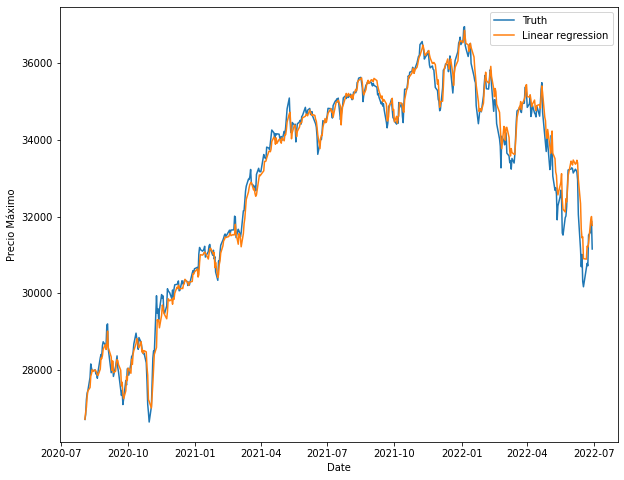

In [141]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('figure', figsize=(10, 8))

plt.plot(data_test_max.index, data_test_max.High )
plt.plot(data_test_max.index, predictions_lr)
# Para agregar mñas lineas de otros DF:
#plt.plot(data_test.index, predictions_rf, c='r')
#plt.plot(data_test.index, predictions_svr, c='g')
plt.xlabel('Date')
plt.ylabel('Precio Máximo')
plt.legend(['Truth', 'Linear regression'])

plt.show()